In [2]:
!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr
key="your_api_key"

In [6]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [7]:
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df=pd.read_csv('AAPL.csv')

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-11-08 00:00:00+00:00,260.14,260.44,256.85,258.69,17520495,63.120851,63.193644,62.322560,62.769021,70081980,0.0,1.0
1,AAPL,2019-11-11 00:00:00+00:00,262.20,262.47,258.28,258.30,20507459,63.620694,63.686207,62.669538,62.674390,82029836,0.0,1.0
2,AAPL,2019-11-12 00:00:00+00:00,261.96,262.79,260.92,261.55,21847226,63.562460,63.763852,63.310112,63.462976,87388904,0.0,1.0
3,AAPL,2019-11-13 00:00:00+00:00,264.47,264.78,261.07,261.13,25817593,64.171491,64.246710,63.346508,63.361067,103270372,0.0,1.0
4,AAPL,2019-11-14 00:00:00+00:00,262.64,264.88,262.10,263.75,22395556,63.727456,64.270974,63.596429,63.996788,89582224,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2024-10-30 00:00:00+00:00,230.10,233.47,229.55,232.610,47070907,230.10,233.47,229.55,232.610,47070907,0.0,1.0
1252,AAPL,2024-10-31 00:00:00+00:00,225.91,229.83,225.37,229.340,64370086,225.91,229.83,225.37,229.340,64370086,0.0,1.0
1253,AAPL,2024-11-01 00:00:00+00:00,222.91,225.35,220.27,220.965,65276741,222.91,225.35,220.27,220.965,65276741,0.0,1.0
1254,AAPL,2024-11-04 00:00:00+00:00,222.01,222.79,219.71,220.990,44944468,222.01,222.79,219.71,220.990,44944468,0.0,1.0
1255,AAPL,2024-11-05 00:00:00+00:00,223.45,223.95,221.14,221.795,28111338,223.45,223.95,221.14,221.795,28111338,0.0,1.0


In [12]:
df1=df.reset_index()['close']

In [13]:
df1

0       260.14
1       262.20
2       261.96
3       264.47
4       262.64
         ...  
1251    230.10
1252    225.91
1253    222.91
1254    222.01
1255    223.45
Name: close, Length: 1256, dtype: float64

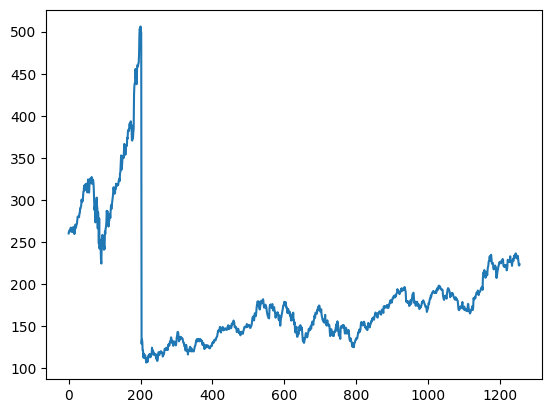

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.38396994]
 [0.38912962]
 [0.38852849]
 ...
 [0.2907201 ]
 [0.28846587]
 [0.29207264]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(816, 440)

In [20]:
train_data

array([[3.83969944e-01],
       [3.89129618e-01],
       [3.88528491e-01],
       [3.94815279e-01],
       [3.90231684e-01],
       [3.98046337e-01],
       [4.01402630e-01],
       [3.99373826e-01],
       [3.91609267e-01],
       [3.88653726e-01],
       [3.88077646e-01],
       [3.99574202e-01],
       [3.94364433e-01],
       [4.03256105e-01],
       [4.01778334e-01],
       [3.94038823e-01],
       [3.82241703e-01],
       [3.87977458e-01],
       [3.97595492e-01],
       [4.10444584e-01],
       [4.00951785e-01],
       [4.04859111e-01],
       [4.10594865e-01],
       [4.12323106e-01],
       [4.21565435e-01],
       [4.33362555e-01],
       [4.34740138e-01],
       [4.33061991e-01],
       [4.33763306e-01],
       [4.32310582e-01],
       [4.43731997e-01],
       [4.44408265e-01],
       [4.58534753e-01],
       [4.58259236e-01],
       [4.62567314e-01],
       [4.67902317e-01],
       [4.84683782e-01],
       [4.77370069e-01],
       [4.83306199e-01],
       [4.79774577e-01],


In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-11-06 14:38:41.561750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 178ms/step - loss: 0.0293 - val_loss: 0.0032
Epoch 2/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0117 - val_loss: 0.0026
Epoch 3/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0095 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 1s 95ms/step - loss: 0.0077 - val_loss: 4.1696e-04
Epoch 5/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0071 - val_loss: 2.8140e-04
Epoch 6/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0067 - val_loss: 5.3040e-04
Epoch 7/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0062 - val_loss: 7.5882e-04
Epoch 8/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0054 - val_loss: 2.5891e-04
Epoch 9/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 10/100
12/12 [==============================] - 1s 87ms/step - loss: 0.00

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.13.1'

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 18ms/step


In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

192.0924119349105

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

193.6992525221927

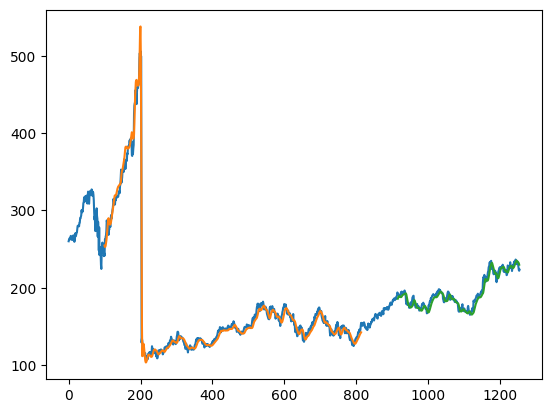

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

440

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.275090795241077,
 0.26912961803381336,
 0.2575829680651221,
 0.25209768315591735,
 0.25372573575453966,
 0.25605510331872255,
 0.26652473387601744,
 0.26865372573575447,
 0.2599373825923606,
 0.27529117094552286,
 0.2841077019411396,
 0.287313713212273,
 0.29931120851596743,
 0.30301815904821533,
 0.3051721978710081,
 0.3159423919849717,
 0.3023919849718221,
 0.30983093299937375,
 0.3194990607388854,
 0.32055103318722594,
 0.3056731371321227,
 0.29390106449592984,
 0.2942266750156543,
 0.2933500313087038,
 0.2959799624295553,
 0.2797745773324984,
 0.27714464621164686,
 0.2783218534752661,
 0.2790231684408265,
 0.2804257983719474,
 0.2886412022542267,
 0.27932373199749533,
 0.28308077645585467,
 0.25655604257983716,
 0.2514464621164683,
 0.2579336255479023,
 0.26667501565435187,
 0.2740137758296806,
 0.27724483406386974,
 0.28661239824671253,
 0.28773951158422034,
 0.29525360050093924,
 0.29858484658735124,
 0.2981840951784595,
 0.29973700688791477,
 0.29946149029430175,
 0.294777708

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps-1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.26912962 0.25758297 0.25209768 0.25372574 0.2560551  0.26652473
 0.26865373 0.25993738 0.27529117 0.2841077  0.28731371 0.29931121
 0.30301816 0.3051722  0.31594239 0.30239198 0.30983093 0.31949906
 0.32055103 0.30567314 0.29390106 0.29422668 0.29335003 0.29597996
 0.27977458 0.27714465 0.27832185 0.27902317 0.2804258  0.2886412
 0.27932373 0.28308078 0.25655604 0.25144646 0.25793363 0.26667502
 0.27401378 0.27724483 0.2866124  0.28773951 0.2952536  0.29858485
 0.2981841  0.29973701 0.29946149 0.29477771 0.30056356 0.30141515
 0.30354415 0.29968691 0.30795241 0.3059737  0.29036944 0.28556043
 0.28939261 0.28548528 0.28571071 0.28370695 0.29009393 0.29036944
 0.28969317 0.27421415 0.27539136 0.28515967 0.30564809 0.30396994
 0.29963682 0.30189105 0.29938635 0.30226675 0.30294302 0.31599249
 0.2989856  0.30041327 0.29763306 0.30046337 0.28766437 0.29788353
 0.30732624 0.30607389 0.30234189 0.3117345  0.31812148 0.31293676
 0.31386349 0.32100188 0.32470883 0.32315592 0.3103

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1256

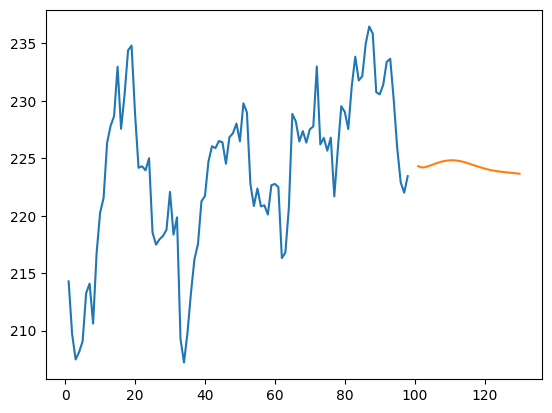

In [50]:
# Ensure day_new and the transformed data have the same number of elements
# Adjust day_new to match the length of df1[1158:]
day_new_adjusted = day_new[:98]

# Flatten y data
y_data = scaler.inverse_transform(df1[1158:]).flatten()

# Now plot
plt.plot(day_new_adjusted, y_data)
plt.plot(day_pred, scaler.inverse_transform(lst_output))


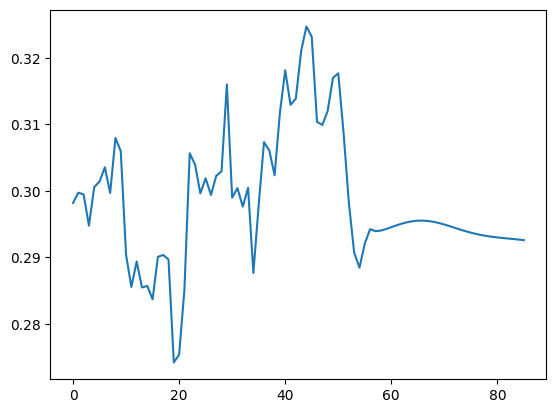

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()

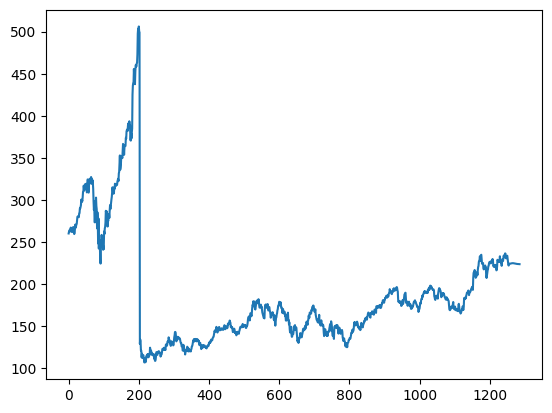

In [53]:
plt.plot(df3)